# Objective : Identify the trends, causes and the demographic insights of the pollution levels across the states of India

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# DATASET:

In [ ]:
## Source: https://www.kaggle.com/shrutibhargava94/india-air-quality-data

In [ ]:
df=pd.read_csv("../input/india-air-quality-data/data.csv",encoding = "ISO-8859-1")

## Features:

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

We can see there are a lot of NAN values in the dataset. As the objective of this notebook is to analyse and get the key trends across the Indian states, so **I am not filling the values as it wont add anything to my findings**

# Key Features

## 1. Sulphur Dioxide(So2)- 

Sulfur dioxide is a gas. It is invisible and has a nasty, sharp smell. It reacts easily with other substances to form harmful compounds, such as sulfuric acid, sulfurous acid and sulfate particles.

About 99% of the sulfur dioxide in air comes from human sources. The main source of sulfur dioxide in the air is industrial activity that processes materials that contain sulfur, eg the generation of electricity from coal, oil or gas that contains sulfur. Some mineral ores also contain sulfur, and sulfur dioxide is released when they are processed. In addition, industrial activities that burn fossil fuels containing sulfur can be important sources of sulfur dioxide.

Sulfur dioxide is also present in motor vehicle emissions, as the result of fuel combustion.

**How it Affects Human Health?**
Sulfur dioxide affects human health when it is breathed in. It irritates the nose, throat, and airways to cause coughing, wheezing, shortness of breath, or a tight feeling around the chest. The effects of sulfur dioxide are felt very quickly and most people would feel the worst symptoms in 10 or 15 minutes after breathing it in.

Those most at risk of developing problems if they are exposed to sulfur dioxide are people with asthma or similar conditions

**Top Contributors**
* Thermal and Coal Plants
* Factories
* Vehicles


## 2. Nitrogen dioxide(No2)- 

**Source:** https://www.lung.org/our-initiatives/healthy-air/outdoor/air-pollution/nitrogen-dioxide.html

Nitrogen dioxide, or NO2, is a gaseous air pollutant composed of nitrogen and oxygen and is one of a group of related gases called nitrogen oxides, or NOx. NO2 forms when fossil fuels such as coal, oil, gas or diesel are burned at high temperatures. NO2 and other nitrogen oxides in the outdoor air contribute to particle pollution and to the chemical reactions that make ozone. It is one of six widespread air pollutants that have national air quality standards to limit them in the outdoor air. NO2 can also form indoors when fossil fuels like wood or natural gas are burned.

**How it Affects Human Health?**
Nitrogen dioxide causes a range of harmful effects on the lungs, including:

Increased inflammation of the airways;
Worsened cough and wheezing;
Reduced lung function;
Increased asthma attacks; and
Greater likelihood of emergency department and hospital admissions.

**Top Contributors**
* Cars, trucks, and buses are the largest sources of emissions, followed by power plants, diesel-powered heavy construction equipment and other movable engines, and industrial boilers. 

## 3. RSPM

**Source:** https://data.gov.in/keywords/rspm

RSPM is that fraction of TSPM which is readily inhaled by humans through their respiratory system and in general, considered as particulate matter with their diameter (aerodynamic) less than 2.5 micrometers. Larger particles would be filtered in the nasal duct.

## 4. SPM

**Source:** http://www.nbrienvis.nic.in/Database/1_2463.aspx

also known as particulate matter (PM) or particulates – are microscopic solid or liquid matter suspended in the Earth's atmosphere. Particulate matter is the sum of all solid and liquid particles suspended in air many of which are hazardous. This complex mixture includes both organic and inorganic particles, such as dust, pollen, soot, smoke, and liquid droplets. These particles vary greatly in size, composition, and origin. It consists of microscopically small solid particles or liquid droplets suspended in the air. The smaller the particles, the deeper they can penetrate into the respiratory system and the more hazardous they are to breathe. Particulate matter is primarily a problem in the wintertime in the Bay Area, when seasonal wood-burning makes a substantial contribution.

## 5. PM 2.5

**Source :** https://blissair.com/what-is-pm-2-5.htm

PM2.5 readings are often included in air quality reports from environmental authorities and companies. Find out what they mean and why you should monitor their levels.

PM2.5 refers to atmospheric particulate matter (PM) that have a diameter of less than 2.5 micrometers, which is about 3% the diameter of a human hair.

Commonly written as PM2.5, particles in this category are so small that they can only be detected with an electron microscope. They are even smaller than their counterparts PM10, which are particles that are 10 micrometres or less, and are also called fine particles.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Cleaning and Keeping only the key features, and dropping the rest

In [ ]:
df=df.drop(['agency','stn_code','location_monitoring_station','sampling_date'], axis = 1) 

In [ ]:
df.head()

In [ ]:
replacements = {
   'state': {
      r'Uttaranchal': 'Uttarakhand', 
   }
}

df.replace(replacements, regex=True, inplace=True)

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['year']=df['date'].dt.year

## Distribution of the Type Feature

In [ ]:
df['type'].value_counts().plot.bar();

**Take Away:**

We can see the maximum of the data is recorded from the residential and rural areas followed by Industrial area

## Distribution and Trend of Nitrogen Dioxide(No2) emission

In [ ]:
df_group_by_so2_year_state =df.groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)

In [ ]:
f,ax=plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)
sns.pointplot(x='year', y='no2', data=df_group_by_so2_year_state);

**Take Away**

We can analyse, there are many ups and downs in the levels of No2 emissions. This could be either because of missing data. After 1992, we can see apart from some peeks there is a general downward trend, which is a good sign.

In [ ]:
df_group_by_type_no2=df.groupby([df['type']])['no2'].median().sort_values(ascending =False)
df_group_by_type_no2.plot.bar(color='g');

**TakeAway : **

Maximum of the No2 emissions are from industrial areas. More regulations must be imposed on industries in order to reduce the emitions.

# Distribution and Trend of Sulphor Dioxide(So2) emission

In [ ]:
f,ax=plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)
sns.pointplot(x='year', y='so2', data=df_group_by_so2_year_state);

**Take Away**

This graph shows a very good trend. We can see overall the emission of So2 is declining very sharply.

In [ ]:
df_group_by_type_so2=df.groupby([df['type']])['so2'].median().sort_values(ascending =False)
df_group_by_type_so2.plot.bar(color='y');

**Take Away**

As compared to the No2 emission, yes the maximum of emission is from industrial area only but the gap between the residential and the industrial area is not that big that means in order to collectivly reduce the emission we have work on both area segments.

# Sulpher Dioxide(So2) Emission Distribution ( based on month)

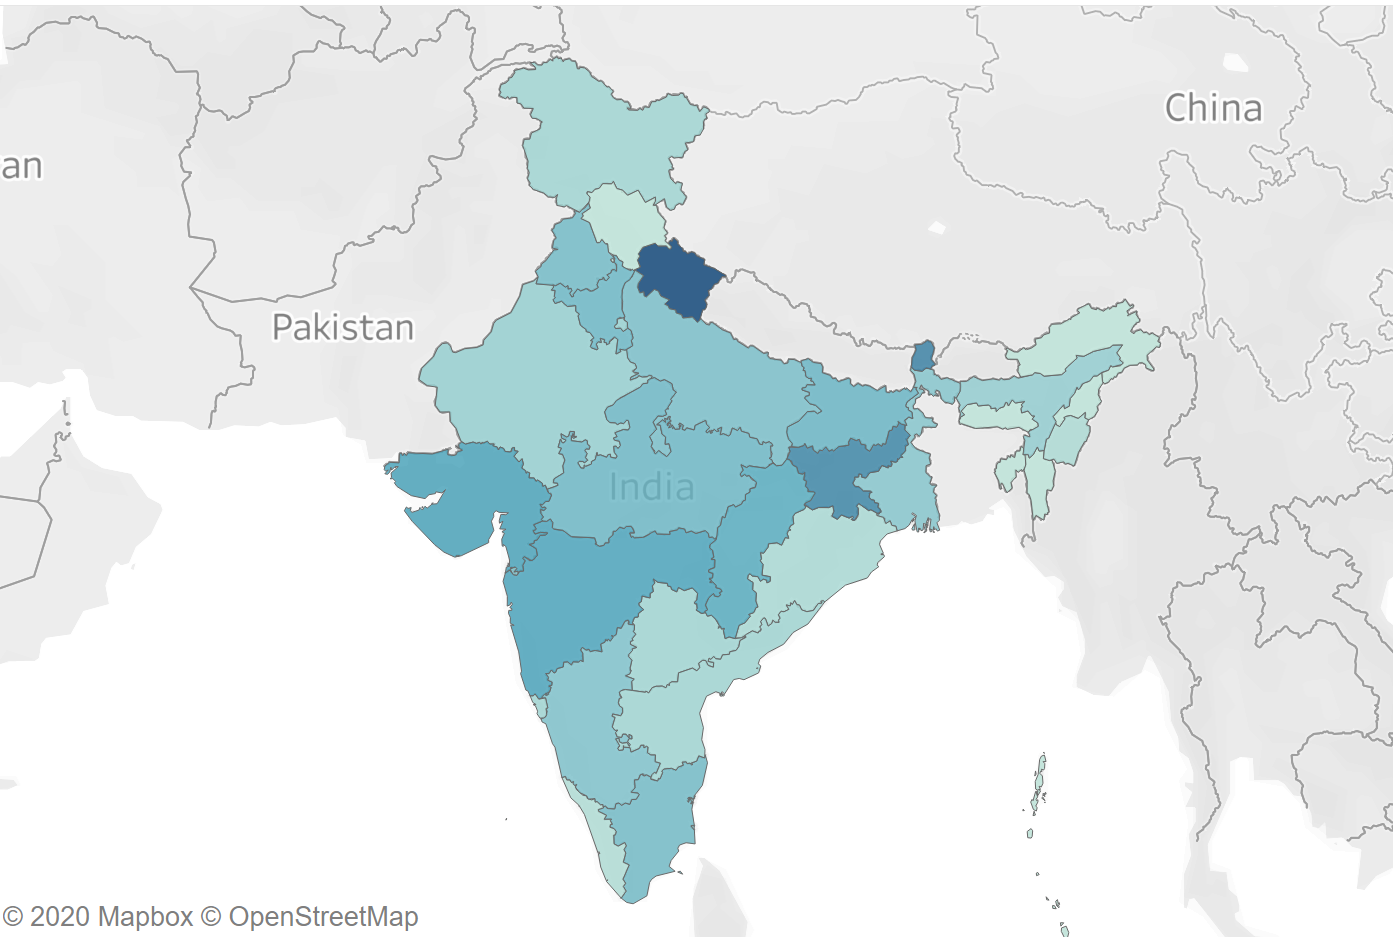

In [ ]:
 df_group_by_month_so2=df.groupby([df['date'].dt.strftime('%B')])['so2'].mean().sort_values(ascending =False)

In [ ]:
df_group_by_month_so2[:5].plot.bar(color='r');

**TakeAway:**

Maximum of the emission happens during the month of January, February and December.

# Nitrogen Dioxide(No2) Emission Distribution ( based on month)

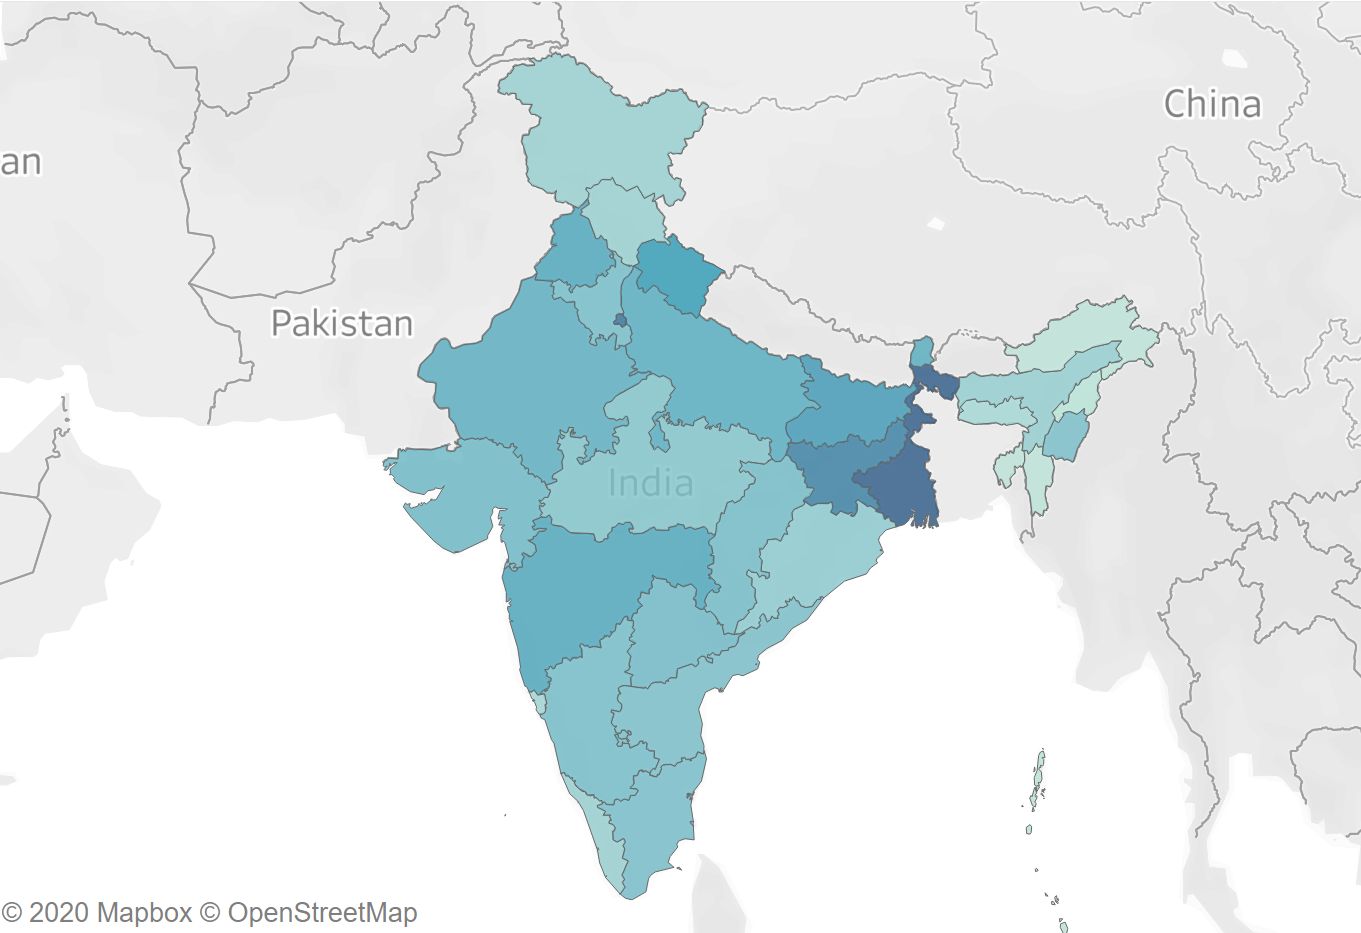

In [ ]:
 df_group_by_month_no2=df.groupby([df['date'].dt.strftime('%B')])['no2'].mean().sort_values(ascending =False)

In [ ]:
df_group_by_month_no2[:5].plot.bar(color='r');

**TakeAway:**

Maximum of the emission happens during the month of January, February and November. Trend is almost similar to the No2 emission.

# Correlation Between Features

In [ ]:
df['pm2_5'].corr(df['so2'])

**TakeAway:**

There is no much correlation between 2.5 ppm and so2 emissions

In [ ]:
df['pm2_5'].corr(df['no2'])

**TakeAway:**

We can see no2 is more responsible for pm2.5 emission. If we target to reduce No2 emission, we can reduce the dangerous ppm2.5 particles.

In [ ]:
df['pm2_5'].corr(df['rspm'])

**TakeAway:**

Obviously, we can see high correlation between RSPM and PM2.5

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Take Away**

As records of 2.5ppm is not much, that is why all analysis are based on So2 and No2

# Distribution of Sulphor Dioxide(So2) emission based on Cities

In [ ]:
 df_group_by_state_so2=df.groupby([df['state']])['so2'].median().sort_values(ascending =False)

In [ ]:
df_group_by_state_so2[:10].plot.bar();

**Take Away**

Maximum of So2 emission is found in Uttrakhand and Sikkim and it is quite strange as unlike cities like Jharkhand, they do not have many thermal plants. And Delhi being the most polluted city in the world, strangely it is not even in top 10.

# Distribution of Nitrogen Dioxide(No2) emission based on Cities

In [ ]:
 df_group_by_state_no2=df.groupby([df['state']])['no2'].median().sort_values(ascending =False)

In [ ]:
df_group_by_state_no2[:10].plot.bar();

**Take Away**

Maximum of No2 emission is found in West Bengal, Delhi and Jharkhand. Cities like Jharkhand, Bihar, Punjab etc are common in both the list. Strangely West Bengal is not in top 10 list of So2 emission. 

# FaceOff between the Toppers of both list - West Bengal VS Uttarakhand

## NO2 Emission

In [ ]:
# df.groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
df_wb_group_by_year_pmno2=df[df['state']=='West Bengal'].groupby('year').median().reset_index().sort_values(by='no2',ascending=False)
df_utk_group_by_year_pmno2=df[df['state']=='Uttarakhand'].groupby('year').median().reset_index().sort_values(by='no2',ascending=False)

In [ ]:
f,ax=plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)
sns.pointplot(x='year', y='no2', data=df_wb_group_by_year_pmno2,ax=ax,color='g');
sns.pointplot(x='year', y='no2', data=df_utk_group_by_year_pmno2,ax=ax);

**Take Away**

West Bengal emission over the years has always been higher than Uttarakhand. There is not much deviation in Uttrakhand rates, unlike West Bengal. But if we see the records of 2015, West Bengal has shown a good improvement.

In [ ]:
# df.groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
df_wb_group_by_year_so2=df[df['state']=='West Bengal'].groupby('year').median().reset_index().sort_values(by='so2',ascending=False)
df_utk_group_by_year_so2=df[df['state']=='Uttarakhand'].groupby('year').median().reset_index().sort_values(by='so2',ascending=False)

In [ ]:
f,ax=plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)
sns.pointplot(x='year', y='so2', data=df_wb_group_by_year_so2,ax=ax,color='g');
sns.pointplot(x='year', y='so2', data=df_utk_group_by_year_so2,ax=ax);

**Take Away**

Although West Bengal has emission higher than Uttrakhand, still Uttarakhand was rated as the highest so2 pollution creating state, this is because of the dip in emissions in 2015 in West Bengal. It is also so unusual that West Bengal reported a sharp dip for both SO2 and No2 emissions. There could be 2 possibility - either the state adopted some great strategy or there is some discripancy in collecting data.